 <h1> <font color='black'> Radon Forecasting Models </font> <h1/> 

### This notebook contains 6 AI models to predict radon at 6 different intervals, from 1 to 6 hours ahead.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import pandas as pd

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

import sys  
sys.path.insert(0, '../')
import RadonDF_Handler

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

The code bellow calls a data handler function, which invokes an external function present in another file which organizes the data to each use case, which are almost same using the radon dataframe, the only difference is that it organizes the data according to the <b>n</b> number passed to the function, <b>n</b> represents the amount of hours we want to forecast in the future.

In [2]:
X1, y1 = RadonDF_Handler.Handler(1)
X2, y2 = RadonDF_Handler.Handler(2)
X3, y3 = RadonDF_Handler.Handler(3)
X4, y4 = RadonDF_Handler.Handler(4)
X5, y5 = RadonDF_Handler.Handler(5)
X6, y6 = RadonDF_Handler.Handler(6)

In [3]:
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)
print(X4.shape, y4.shape)
print(X5.shape, y5.shape)
print(X6.shape, y6.shape)

(115628, 6, 5) (115628,)
(115627, 6, 5) (115627,)
(115626, 6, 5) (115626,)
(115625, 6, 5) (115625,)
(115624, 6, 5) (115624,)
(115623, 6, 5) (115623,)


 <h3> <font color='orange'> Data split </font> <h3/> 

In [4]:
X1_train, y1_train = X1[:92508], y1[:92508] # training data
X1_val, y1_val = X1[92508:95508], y1[92508:95508] #validation
X1_test, y1_test = X1[95508:], y1[95508:] #test
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape

((92508, 6, 5), (92508,), (3000, 6, 5), (3000,), (20120, 6, 5), (20120,))

In [7]:
X2_train, y2_train = X2[:92508], y2[:92508] # training data
X2_val, y2_val = X2[92508:95508], y2[92508:95508] #validation
X2_test, y2_test = X2[95508:], y2[95508:] #test
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((92508, 6, 5), (92508,), (3000, 6, 5), (3000,), (20119, 6, 5), (20119,))

In [8]:
X3_train, y3_train = X3[:92508], y3[:92508] # training data
X3_val, y3_val = X3[92508:95508], y3[92508:95508] #validation
X3_test, y3_test = X3[95508:], y3[95508:] #test
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((92508, 6, 5), (92508,), (3000, 6, 5), (3000,), (20118, 6, 5), (20118,))

In [9]:
X4_train, y4_train = X4[:92508], y4[:92508] # training data
X4_val, y4_val = X4[92508:95508], y4[92508:95508] #validation
X4_test, y4_test = X4[95508:], y4[95508:] #test
X4_train.shape, y4_train.shape, X4_val.shape, y4_val.shape, X4_test.shape, y4_test.shape

((92508, 6, 5), (92508,), (3000, 6, 5), (3000,), (20117, 6, 5), (20117,))

In [10]:
X5_train, y5_train = X5[:92508], y5[:92508] # training data
X5_val, y5_val = X5[92508:95508], y5[92508:95508] #validation
X5_test, y5_test = X5[95508:], y5[95508:] #test
X5_train.shape, y5_train.shape, X5_val.shape, y5_val.shape, X5_test.shape, y5_test.shape

((92508, 6, 5), (92508,), (3000, 6, 5), (3000,), (20116, 6, 5), (20116,))

In [11]:
X6_train, y6_train = X6[:92508], y6[:92508] # training data
X6_val, y6_val = X6[92508:95508], y6[92508:95508] #validation
X6_test, y6_test = X6[95508:], y6[95508:] #test
X6_train.shape, y6_train.shape, X6_val.shape, y6_val.shape, X6_test.shape, y6_test.shape

((92508, 6, 5), (92508,), (3000, 6, 5), (3000,), (20115, 6, 5), (20115,))

 <h1> <font color='red'> Model training </font> <h1/> 

In [5]:
model = Sequential()
model.add(InputLayer((6, 5)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17920     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [6]:
plt.style.use('seaborn')

 <h3> <font color='orange'> 1 hour forecasting model training </font> <h3/> 

In [7]:
cp1= ModelCheckpoint('1H_ForecastModel/', save_best_only=True)
model.compile(loss=MeanSquaredError(), 
               optimizer=Adam(learning_rate=0.0001), 
               metrics=[MeanAbsoluteError()])
model.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=25, callbacks=[cp1])

Epoch 1/25
2891/2891 [==============================] - 18s 5ms/step - loss: 1589402.6250 - mean_absolute_error: 651.1882 - val_loss: 248702.3125 - val_mean_absolute_error: 419.3428oss: 1622021.
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 2/25
2891/2891 [==============================] - 15s 5ms/step - loss: 1442376.8750 - mean_absolute_error: 568.1996 - val_loss: 145093.0781 - val_mean_absolute_error: 292.3193
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 3/25
2891/2891 [==============================] - 15s 5ms/step - loss: 1268149.2500 - mean_absolute_error: 486.4614 - val_loss: 62494.9062 - val_mean_absolute_error: 164.7404
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 4/25
2891/2891 [==============================] - 15s 5ms/step - loss: 1083681.0000 - mean_absolute_error: 421.6380 - val_loss: 21480.0449 - val_mean_absolute_error: 80.2916
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 5/25
2891/2891 [==============================] - 15s 5ms/step - loss: 895464.3125 - mean_absolute_error: 373.1951 - val_loss: 12182.8828 - val_mean_absolute_error: 59.3654
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 6/25
2891/2891 [==============================] - 15s 5ms/step - loss: 710342.2500 - mean_absolute_error: 332.2882 - val_loss: 9705.0742 - val_mean_absolute_error: 56.1956
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 7/25
2891/2891 [==============================] - 15s 5ms/step - loss: 532787.3125 - mean_absolute_error: 292.0593 - val_loss: 9387.7422 - val_mean_absolute_error: 55.5187
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 8/25
2891/2891 [==============================] - 15s 5ms/step - loss: 367836.0312 - mean_absolute_error: 249.2348 - val_loss: 9387.0469 - val_mean_absolute_error: 54.8375
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 9/25
2891/2891 [==============================] - 15s 5ms/step - loss: 227686.7969 - mean_absolute_error: 205.6328 - val_loss: 10234.2178 - val_mean_absolute_error: 59.4800
Epoch 10/25
2891/2891 [==============================] - 15s 5ms/step - loss: 123672.8516 - mean_absolute_error: 160.7269 - val_loss: 9341.8398 - val_mean_absolute_error: 54.6943
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 11/25
2891/2891 [==============================] - 15s 5ms/step - loss: 61457.0625 - mean_absolute_error: 117.2993 - val_loss: 9821.1230 - val_mean_absolute_error: 58.6480
Epoch 12/25
2891/2891 [==============================] - 15s 5ms/step - loss: 38243.8320 - mean_absolute_error: 83.5114 - val_loss: 9481.9092 - val_mean_absolute_error: 53.8377
Epoch 13/25
2891/2891 [==============================] - 16s 5ms/step - loss: 35119.7422 - mean_absolute_error: 70.7952 - val_loss: 9388.4502 - val_mean_absolute_error: 56.1696
Epoch 14/25
2891/2891 [==============================] - 16s 6ms/step - loss: 34747.3008 - mean_absolute_error: 70.6078 - val_loss: 9193.2920 - val_mean_absolute_error: 53.8771
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 15/25
2891/2891 [==============================] - 16s 6ms/step - loss: 34429.7695 - mean_absolute_error: 68.5666 - val_loss: 9811.1006 - val_mean_absolute_error: 58.0498
Epoch 16/25
2891/2891 [==============================] - 15s 5ms/step - loss: 34481.1953 - mean_absolute_error: 69.8118 - val_loss: 9217.3438 - val_mean_absolute_error: 54.4138
Epoch 17/25
2891/2891 [==============================] - 16s 5ms/step - loss: 33973.0898 - mean_absolute_error: 68.6015 - val_loss: 9499.6260 - val_mean_absolute_error: 54.4834
Epoch 18/25
2891/2891 [==============================] - 15s 5ms/step - loss: 34168.9297 - mean_absolute_error: 69.7125 - val_loss: 9906.3857 - val_mean_absolute_error: 57.1010 - ETA: 0s - loss: 34283.1211 
Epoch 19/25
2891/2891 [==============================] - 15s 5ms/step - loss: 34331.9922 - mean_absolute_error: 72.0138 - val_loss: 9641.7285 - val_mean_absolute_error: 55.5051
Epoch 20/25
2891/2891 [==============================] - 15s 5ms/step - loss: 34024.0

In [8]:
model1 = load_model('1H_ForecastModel/')

In [9]:
model1.evaluate(X1_test,y1_test)

629/629 [==============================] - 2s 2ms/step - loss: 30040.2129 - mean_absolute_error: 63.4368


[30040.212890625, 63.43684768676758]

In [10]:
test_predictions1 = model.predict(X1_test).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions 1 hour model':test_predictions1, 'Actuals':y1_test})

In [11]:
test_results1.head(30)

,Test Predictions 1 hour model,Actuals
0,883.834167,862.405000
1,732.703796,841.680000
2,743.365967,854.633333
3,761.296265,853.469000
4,767.376831,890.230000
5,808.820435,815.413333
6,708.394653,811.605455
7,726.901855,804.932500
8,723.892334,808.569167
9,729.724731,822.270909


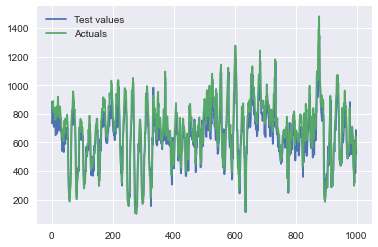

In [12]:
plt.plot(test_results1['Test Predictions 1 hour model'][:1000])
plt.plot(test_results1['Actuals'][:1000])
plt.legend(['Test values','Actuals'])

 <h3> <font color='orange'> 2 hour forecasting model training </font> <h3/> 

In [77]:
cp2= ModelCheckpoint('2H_ForecastModel/', save_best_only=True)
model.compile(loss=MeanSquaredError(), 
               optimizer=Adam(learning_rate=0.0001), 
               metrics=[MeanAbsoluteError()])
               #metrics=[MeanAbsoluteError()])
model.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=25, callbacks=[cp2])

Epoch 1/25
2891/2891 [==============================] - 18s 6ms/step - loss: 54831.4336 - mean_absolute_error: 96.0571 - val_loss: 19267.6719 - val_mean_absolute_error: 89.8546
INFO:tensorflow:Assets written to: 2H_ForecastModel\assets


INFO:tensorflow:Assets written to: 2H_ForecastModel\assets


Epoch 2/25
2891/2891 [==============================] - 15s 5ms/step - loss: 53913.4414 - mean_absolute_error: 96.4282 - val_loss: 24846.9004 - val_mean_absolute_error: 101.6309
Epoch 3/25
2891/2891 [==============================] - 14s 5ms/step - loss: 54200.8594 - mean_absolute_error: 97.6558 - val_loss: 18767.5547 - val_mean_absolute_error: 84.5749
INFO:tensorflow:Assets written to: 2H_ForecastModel\assets


INFO:tensorflow:Assets written to: 2H_ForecastModel\assets


Epoch 4/25
2891/2891 [==============================] - 13s 5ms/step - loss: 54447.5703 - mean_absolute_error: 98.1069 - val_loss: 18261.4551 - val_mean_absolute_error: 85.7629
INFO:tensorflow:Assets written to: 2H_ForecastModel\assets


INFO:tensorflow:Assets written to: 2H_ForecastModel\assets


Epoch 5/25
2891/2891 [==============================] - 14s 5ms/step - loss: 53703.8242 - mean_absolute_error: 96.8884 - val_loss: 24962.6191 - val_mean_absolute_error: 102.1816
Epoch 6/25
2891/2891 [==============================] - 17s 6ms/step - loss: 53168.3438 - mean_absolute_error: 96.3537 - val_loss: 20391.9062 - val_mean_absolute_error: 90.9512
Epoch 7/25
2891/2891 [==============================] - 16s 6ms/step - loss: 52850.6289 - mean_absolute_error: 96.3714 - val_loss: 19054.3262 - val_mean_absolute_error: 88.4691
Epoch 8/25
2891/2891 [==============================] - 14s 5ms/step - loss: 52743.7383 - mean_absolute_error: 95.7975 - val_loss: 20055.3926 - val_mean_absolute_error: 91.0833
Epoch 9/25
2891/2891 [==============================] - 14s 5ms/step - loss: 53091.8398 - mean_absolute_error: 96.8533 - val_loss: 19169.3145 - val_mean_absolute_error: 86.5156
Epoch 10/25
2891/2891 [==============================] - 14s 5ms/step - loss: 52776.4492 - mean_absolute_error: 95

In [88]:
model2 = load_model('2H_ForecastModel/')

In [89]:
model2.evaluate(X2_test,y2_test)

629/629 [==============================] - 2s 3ms/step - loss: 55476.3477 - mean_absolute_error: 97.3206


[55476.34765625, 97.32058715820312]

In [90]:

test_predictions2 = model.predict(X2_test).flatten()
test_results2 = pd.DataFrame(data={'Test Predictions 2 hour model':test_predictions2, 'Actuals':y2_test})

In [93]:
test_results2.head(30)

,Test Predictions 2 hour model,Actuals
0,875.315430,841.680000
1,732.865112,854.633333
2,710.885437,853.469000
3,725.066223,890.230000
4,660.390381,815.413333
5,598.989563,811.605455
6,502.999664,804.932500
7,528.108032,808.569167
8,634.122253,822.270909
9,681.987244,844.027500


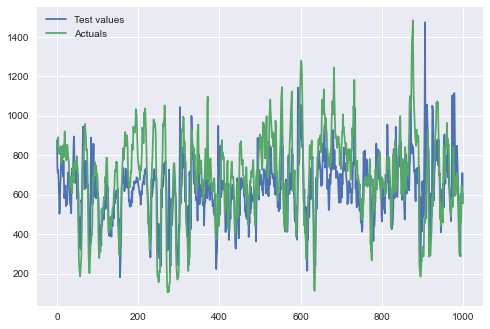

In [94]:

plt.plot(test_results2['Test Predictions 2 hour model'][:1000])
plt.plot(test_results2['Actuals'][:1000])
plt.legend(['Test values','Actuals'])

 <h3> <font color='orange'> 3 hour forecasting model training </font> <h3/> 

In [78]:
cp3= ModelCheckpoint('3H_ForecastModel/', save_best_only=True)
model.compile(loss=MeanSquaredError(), 
               optimizer=Adam(learning_rate=0.0001), 
               metrics=[MeanAbsoluteError()])
               #metrics=[MeanAbsoluteError()])
model.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=25, callbacks=[cp3])

Epoch 1/25
2891/2891 [==============================] - 17s 5ms/step - loss: 68803.5312 - mean_absolute_error: 115.5359 - val_loss: 35271.7891 - val_mean_absolute_error: 131.0962- loss: 68324.0234
INFO:tensorflow:Assets written to: 3H_ForecastModel\assets


INFO:tensorflow:Assets written to: 3H_ForecastModel\assets


Epoch 2/25
2891/2891 [==============================] - 13s 5ms/step - loss: 67982.8906 - mean_absolute_error: 114.9455 - val_loss: 36570.8203 - val_mean_absolute_error: 127.4773
Epoch 3/25
2891/2891 [==============================] - 14s 5ms/step - loss: 67917.0781 - mean_absolute_error: 116.3107 - val_loss: 33511.3320 - val_mean_absolute_error: 126.3203
INFO:tensorflow:Assets written to: 3H_ForecastModel\assets


INFO:tensorflow:Assets written to: 3H_ForecastModel\assets


Epoch 4/25
2891/2891 [==============================] - 13s 5ms/step - loss: 68048.9531 - mean_absolute_error: 116.5886 - val_loss: 36857.7266 - val_mean_absolute_error: 137.2179
Epoch 5/25
2891/2891 [==============================] - 13s 5ms/step - loss: 67177.7969 - mean_absolute_error: 115.2210 - val_loss: 34618.8633 - val_mean_absolute_error: 131.2265
Epoch 6/25
2891/2891 [==============================] - 13s 5ms/step - loss: 67347.6406 - mean_absolute_error: 114.7029 - val_loss: 37514.9258 - val_mean_absolute_error: 137.2361
Epoch 7/25
2891/2891 [==============================] - 14s 5ms/step - loss: 67293.6797 - mean_absolute_error: 114.7908 - val_loss: 37651.8008 - val_mean_absolute_error: 134.9312
Epoch 8/25
2891/2891 [==============================] - 14s 5ms/step - loss: 66697.8359 - mean_absolute_error: 114.8528 - val_loss: 35025.8516 - val_mean_absolute_error: 128.0461
Epoch 9/25
2891/2891 [==============================] - 13s 5ms/step - loss: 66820.6250 - mean_absolute_e

INFO:tensorflow:Assets written to: 3H_ForecastModel\assets


Epoch 16/25
2891/2891 [==============================] - 13s 5ms/step - loss: 66351.2734 - mean_absolute_error: 114.2376 - val_loss: 43415.0820 - val_mean_absolute_error: 144.8524
Epoch 17/25
2891/2891 [==============================] - 14s 5ms/step - loss: 66161.8984 - mean_absolute_error: 114.6000 - val_loss: 38342.6836 - val_mean_absolute_error: 137.3993
Epoch 18/25
2891/2891 [==============================] - 13s 5ms/step - loss: 66406.7969 - mean_absolute_error: 114.8855 - val_loss: 56965.5234 - val_mean_absolute_error: 154.9095
Epoch 19/25
2891/2891 [==============================] - 13s 5ms/step - loss: 66427.4375 - mean_absolute_error: 114.9662 - val_loss: 34600.8203 - val_mean_absolute_error: 130.1519
Epoch 20/25
2891/2891 [==============================] - 13s 5ms/step - loss: 66137.9062 - mean_absolute_error: 114.5188 - val_loss: 39153.1523 - val_mean_absolute_error: 141.4548
Epoch 21/25
2891/2891 [==============================] - 13s 5ms/step - loss: 66461.9609 - mean_abso

In [95]:
model3 = load_model('3H_ForecastModel/')

In [96]:
model3.evaluate(X3_test,y3_test)

629/629 [==============================] - 2s 2ms/step - loss: 85036.6875 - mean_absolute_error: 142.3340


[85036.6875, 142.33395385742188]

In [97]:

test_predictions3 = model.predict(X3_test).flatten()
test_results3 = pd.DataFrame(data={'Test Predictions 3 hour model':test_predictions3, 'Actuals':y3_test})


In [98]:
test_results3.head(30)

,Test Predictions 3 hour model,Actuals
0,875.315430,854.633333
1,732.865112,853.469000
2,710.885437,890.230000
3,725.066223,815.413333
4,660.390381,811.605455
5,598.989563,804.932500
6,502.999664,808.569167
7,528.108032,822.270909
8,634.122253,844.027500
9,681.987244,759.144167


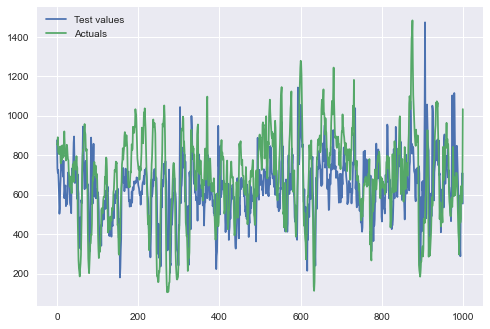

In [99]:
plt.plot(test_results3['Test Predictions 3 hour model'][:1000])
plt.plot(test_results3['Actuals'][:1000])
plt.legend(['Test values','Actuals'])

 <h3> <font color='orange'> 4 hour forecasting model training </font> <h3/> 

In [80]:
cp4= ModelCheckpoint('4H_ForecastModel/', save_best_only=True)
model.compile(loss=MeanSquaredError(), 
               optimizer=Adam(learning_rate=0.0001), 
               metrics=[MeanAbsoluteError()])
               #metrics=[MeanAbsoluteError()])
model.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs=25, callbacks=[cp4])

Epoch 1/25
2891/2891 [==============================] - 16s 5ms/step - loss: 75721.4297 - mean_absolute_error: 128.1849 - val_loss: 49461.9375 - val_mean_absolute_error: 153.5156
INFO:tensorflow:Assets written to: 4H_ForecastModel\assets


INFO:tensorflow:Assets written to: 4H_ForecastModel\assets


Epoch 2/25
2891/2891 [==============================] - 13s 4ms/step - loss: 75709.4219 - mean_absolute_error: 127.7693 - val_loss: 66202.0938 - val_mean_absolute_error: 174.9056
Epoch 3/25
2891/2891 [==============================] - 13s 5ms/step - loss: 75592.4453 - mean_absolute_error: 127.8267 - val_loss: 52529.5078 - val_mean_absolute_error: 165.7300
Epoch 4/25
2891/2891 [==============================] - 14s 5ms/step - loss: 75665.0781 - mean_absolute_error: 126.3588 - val_loss: 44848.2305 - val_mean_absolute_error: 149.5480
INFO:tensorflow:Assets written to: 4H_ForecastModel\assets


INFO:tensorflow:Assets written to: 4H_ForecastModel\assets


Epoch 5/25
2891/2891 [==============================] - 13s 5ms/step - loss: 75531.8516 - mean_absolute_error: 127.6380 - val_loss: 63467.0508 - val_mean_absolute_error: 171.9091
Epoch 6/25
2891/2891 [==============================] - 13s 5ms/step - loss: 75635.6484 - mean_absolute_error: 127.2281 - val_loss: 60568.7109 - val_mean_absolute_error: 165.7847
Epoch 7/25
2891/2891 [==============================] - 13s 5ms/step - loss: 75160.4375 - mean_absolute_error: 127.2184 - val_loss: 45096.6328 - val_mean_absolute_error: 149.0660
Epoch 8/25
2891/2891 [==============================] - 14s 5ms/step - loss: 75649.4922 - mean_absolute_error: 126.5036 - val_loss: 54276.6133 - val_mean_absolute_error: 159.3191
Epoch 9/25
2891/2891 [==============================] - 14s 5ms/step - loss: 75397.0000 - mean_absolute_error: 127.3665 - val_loss: 63596.6016 - val_mean_absolute_error: 172.9404
Epoch 10/25
2891/2891 [==============================] - 13s 5ms/step - loss: 75071.4375 - mean_absolute_

INFO:tensorflow:Assets written to: 4H_ForecastModel\assets


Epoch 15/25
2891/2891 [==============================] - 13s 5ms/step - loss: 75173.7969 - mean_absolute_error: 126.3758 - val_loss: 50045.3594 - val_mean_absolute_error: 158.0322
Epoch 16/25
2891/2891 [==============================] - 13s 5ms/step - loss: 75163.4844 - mean_absolute_error: 127.3449 - val_loss: 46855.3711 - val_mean_absolute_error: 155.3880
Epoch 17/25
2891/2891 [==============================] - 13s 5ms/step - loss: 74927.1484 - mean_absolute_error: 127.2614 - val_loss: 57284.4922 - val_mean_absolute_error: 162.5155
Epoch 18/25
2891/2891 [==============================] - 14s 5ms/step - loss: 74598.0547 - mean_absolute_error: 127.8833 - val_loss: 56663.7188 - val_mean_absolute_error: 169.9900
Epoch 19/25
2891/2891 [==============================] - 13s 5ms/step - loss: 75303.8828 - mean_absolute_error: 127.6606 - val_loss: 48940.9297 - val_mean_absolute_error: 159.0770
Epoch 20/25
2891/2891 [==============================] - 13s 5ms/step - loss: 75232.3125 - mean_abso

In [100]:
model4 = load_model('4H_ForecastModel/')

In [101]:
model4.evaluate(X4_test,y4_test)


629/629 [==============================] - 2s 2ms/step - loss: 126138.7109 - mean_absolute_error: 191.7195: 1s - loss: 63728.3711 -  - ETA: 0s - loss: 142682.0625 - mean_absolute_error


[126138.7109375, 191.71954345703125]

In [102]:
test_predictions4 = model.predict(X4_test).flatten()
test_results4 = pd.DataFrame(data={'Test Predictions 4 hour model':test_predictions4, 'Actuals':y4_test})

In [103]:
test_results4.head(30)

,Test Predictions 4 hour model,Actuals
0,875.315430,853.469000
1,732.865112,890.230000
2,710.885437,815.413333
3,725.066223,811.605455
4,660.390381,804.932500
5,598.989563,808.569167
6,502.999664,822.270909
7,528.108032,844.027500
8,634.122253,759.144167
9,681.987244,758.683333


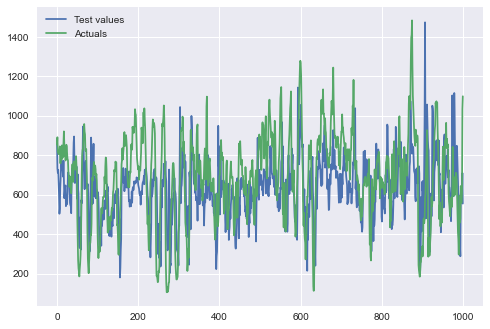

In [104]:
plt.plot(test_results4['Test Predictions 4 hour model'][:1000])
plt.plot(test_results4['Actuals'][:1000])
plt.legend(['Test values','Actuals'])

 <h3> <font color='orange'> 5 hour forecasting model training </font> <h3/> 

In [81]:
cp5= ModelCheckpoint('5H_ForecastModel/', save_best_only=True)
model.compile(loss=MeanSquaredError(), 
               optimizer=Adam(learning_rate=0.0001), 
               metrics=[MeanAbsoluteError()])
               #metrics=[MeanAbsoluteError()])
model.fit(X5_train, y5_train, validation_data=(X5_val, y5_val), epochs=25, callbacks=[cp5])

Epoch 1/25
2891/2891 [==============================] - 16s 5ms/step - loss: 85151.3516 - mean_absolute_error: 139.1710 - val_loss: 58776.4688 - val_mean_absolute_error: 168.6021
INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


Epoch 2/25
2891/2891 [==============================] - 13s 5ms/step - loss: 85186.7891 - mean_absolute_error: 140.3457 - val_loss: 73573.9219 - val_mean_absolute_error: 194.7535
Epoch 3/25
2891/2891 [==============================] - 13s 5ms/step - loss: 84278.0312 - mean_absolute_error: 139.7397 - val_loss: 61033.5938 - val_mean_absolute_error: 184.8909
Epoch 4/25
2891/2891 [==============================] - 13s 5ms/step - loss: 83641.0859 - mean_absolute_error: 137.9988 - val_loss: 69009.5078 - val_mean_absolute_error: 180.7381
Epoch 5/25
2891/2891 [==============================] - 13s 5ms/step - loss: 83931.3750 - mean_absolute_error: 139.0726 - val_loss: 67213.7578 - val_mean_absolute_error: 188.1661
Epoch 6/25
2891/2891 [==============================] - 14s 5ms/step - loss: 84090.2578 - mean_absolute_error: 139.4399 - val_loss: 58633.4883 - val_mean_absolute_error: 175.3478
INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


Epoch 7/25
2891/2891 [==============================] - 13s 5ms/step - loss: 83908.5781 - mean_absolute_error: 139.3132 - val_loss: 70208.6484 - val_mean_absolute_error: 190.3334
Epoch 8/25
2891/2891 [==============================] - 13s 5ms/step - loss: 83745.6719 - mean_absolute_error: 138.1346 - val_loss: 56378.9453 - val_mean_absolute_error: 168.8537
INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


Epoch 9/25
2891/2891 [==============================] - 13s 5ms/step - loss: 83632.5156 - mean_absolute_error: 137.5503 - val_loss: 89401.1172 - val_mean_absolute_error: 202.4059
Epoch 10/25
2891/2891 [==============================] - 14s 5ms/step - loss: 83915.5781 - mean_absolute_error: 138.0596 - val_loss: 72639.6719 - val_mean_absolute_error: 186.3517
Epoch 11/25
2891/2891 [==============================] - 14s 5ms/step - loss: 83473.2578 - mean_absolute_error: 138.3517 - val_loss: 64201.0938 - val_mean_absolute_error: 186.7325
Epoch 12/25
2891/2891 [==============================] - 14s 5ms/step - loss: 83420.9062 - mean_absolute_error: 137.9076 - val_loss: 67546.1641 - val_mean_absolute_error: 187.3668
Epoch 13/25
2891/2891 [==============================] - 14s 5ms/step - loss: 83064.9297 - mean_absolute_error: 137.0330 - val_loss: 61011.5898 - val_mean_absolute_error: 176.0240
Epoch 14/25
2891/2891 [==============================] - 14s 5ms/step - loss: 82803.3672 - mean_absol

INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


Epoch 15/25
2891/2891 [==============================] - 13s 5ms/step - loss: 83221.9531 - mean_absolute_error: 138.4341 - val_loss: 67194.0859 - val_mean_absolute_error: 180.4648
Epoch 16/25
2891/2891 [==============================] - 14s 5ms/step - loss: 82841.8047 - mean_absolute_error: 137.2658 - val_loss: 60523.8242 - val_mean_absolute_error: 173.1997
Epoch 17/25
2891/2891 [==============================] - 14s 5ms/step - loss: 82806.6875 - mean_absolute_error: 136.3954 - val_loss: 71776.8203 - val_mean_absolute_error: 184.0705
Epoch 18/25
2891/2891 [==============================] - 14s 5ms/step - loss: 82680.3828 - mean_absolute_error: 135.9059 - val_loss: 58295.4492 - val_mean_absolute_error: 167.4285
Epoch 19/25
2891/2891 [==============================] - 14s 5ms/step - loss: 82393.8359 - mean_absolute_error: 136.8316 - val_loss: 54115.4648 - val_mean_absolute_error: 167.3857
INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


Epoch 20/25
2891/2891 [==============================] - 13s 5ms/step - loss: 82635.1641 - mean_absolute_error: 136.4949 - val_loss: 54082.8203 - val_mean_absolute_error: 167.1576
INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


INFO:tensorflow:Assets written to: 5H_ForecastModel\assets


Epoch 21/25
2891/2891 [==============================] - 13s 5ms/step - loss: 82507.9141 - mean_absolute_error: 136.2337 - val_loss: 55361.8672 - val_mean_absolute_error: 166.9550
Epoch 22/25
2891/2891 [==============================] - 13s 5ms/step - loss: 82493.9375 - mean_absolute_error: 136.4163 - val_loss: 64293.9375 - val_mean_absolute_error: 175.4979
Epoch 23/25
2891/2891 [==============================] - 14s 5ms/step - loss: 82647.5938 - mean_absolute_error: 135.7076 - val_loss: 67523.9609 - val_mean_absolute_error: 178.9017
Epoch 24/25
2891/2891 [==============================] - 14s 5ms/step - loss: 82368.6719 - mean_absolute_error: 136.2557 - val_loss: 65219.4883 - val_mean_absolute_error: 180.5933
Epoch 25/25
2891/2891 [==============================] - 14s 5ms/step - loss: 82279.0391 - mean_absolute_error: 136.6261 - val_loss: 56673.9023 - val_mean_absolute_error: 169.8088


In [105]:
model5 = load_model('5H_ForecastModel/')

In [106]:
model5.evaluate(X5_test,y5_test)

629/629 [==============================] - 2s 2ms/step - loss: 147993.8750 - mean_absolute_error: 205.4079: 0s - loss: 100808.


[147993.875, 205.40785217285156]

In [107]:
test_predictions5 = model.predict(X5_test).flatten()
test_results5 = pd.DataFrame(data={'Test Predictions 5 hour model':test_predictions5, 'Actuals':y5_test})


In [108]:
test_results5.head(30)

,Test Predictions 5 hour model,Actuals
0,875.315430,890.230000
1,732.865112,815.413333
2,710.885437,811.605455
3,725.066223,804.932500
4,660.390381,808.569167
5,598.989563,822.270909
6,502.999664,844.027500
7,528.108032,759.144167
8,634.122253,758.683333
9,681.987244,807.364545


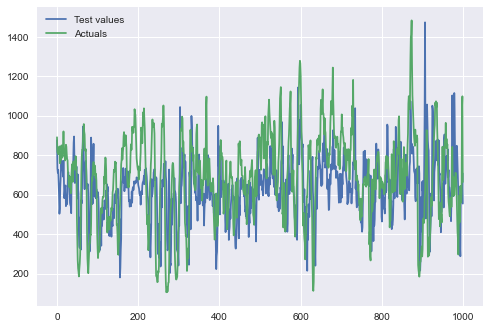

In [109]:
plt.plot(test_results5['Test Predictions 5 hour model'][:1000])
plt.plot(test_results5['Actuals'][:1000])
plt.legend(['Test values','Actuals'])

 <h3> <font color='orange'> 6 hour forecasting model training </font> <h3/> 

In [82]:
cp6= ModelCheckpoint('6H_ForecastModel/', save_best_only=True)
model.compile(loss=MeanSquaredError(), 
               optimizer=Adam(learning_rate=0.0001), 
               metrics=[MeanAbsoluteError()])
               #metrics=[MeanAbsoluteError()])
model.fit(X6_train, y6_train, validation_data=(X6_val, y6_val), epochs=25, callbacks=[cp6])

Epoch 1/25
2891/2891 [==============================] - 16s 5ms/step - loss: 91360.8516 - mean_absolute_error: 146.6762 - val_loss: 85640.5391 - val_mean_absolute_error: 205.2764
INFO:tensorflow:Assets written to: 6H_ForecastModel\assets


INFO:tensorflow:Assets written to: 6H_ForecastModel\assets


Epoch 2/25
2891/2891 [==============================] - 13s 5ms/step - loss: 90785.5000 - mean_absolute_error: 146.9301 - val_loss: 74027.4375 - val_mean_absolute_error: 203.8978
INFO:tensorflow:Assets written to: 6H_ForecastModel\assets


INFO:tensorflow:Assets written to: 6H_ForecastModel\assets


Epoch 3/25
2891/2891 [==============================] - 13s 5ms/step - loss: 90853.3125 - mean_absolute_error: 146.9299 - val_loss: 82703.5781 - val_mean_absolute_error: 203.4913
Epoch 4/25
2891/2891 [==============================] - 14s 5ms/step - loss: 90610.2266 - mean_absolute_error: 147.2263 - val_loss: 100305.8672 - val_mean_absolute_error: 222.1135
Epoch 5/25
2891/2891 [==============================] - 14s 5ms/step - loss: 90274.5234 - mean_absolute_error: 147.0206 - val_loss: 71705.5625 - val_mean_absolute_error: 196.3114A: 1s - loss: 90702.812
INFO:tensorflow:Assets written to: 6H_ForecastModel\assets


INFO:tensorflow:Assets written to: 6H_ForecastModel\assets


Epoch 6/25
2891/2891 [==============================] - 5667s 2s/step - loss: 90884.3906 - mean_absolute_error: 146.3615 - val_loss: 62524.9102 - val_mean_absolute_error: 181.7155
INFO:tensorflow:Assets written to: 6H_ForecastModel\assets


INFO:tensorflow:Assets written to: 6H_ForecastModel\assets


Epoch 7/25
2891/2891 [==============================] - 17s 6ms/step - loss: 90056.0938 - mean_absolute_error: 145.7214 - val_loss: 84362.9375 - val_mean_absolute_error: 204.7635
Epoch 8/25
2891/2891 [==============================] - 15s 5ms/step - loss: 89643.7578 - mean_absolute_error: 144.9894 - val_loss: 105304.2109 - val_mean_absolute_error: 232.0307
Epoch 9/25
2891/2891 [==============================] - 15s 5ms/step - loss: 89899.1016 - mean_absolute_error: 145.7886 - val_loss: 80858.8672 - val_mean_absolute_error: 211.0402
Epoch 10/25
2891/2891 [==============================] - 15s 5ms/step - loss: 89632.7109 - mean_absolute_error: 145.0463 - val_loss: 78484.1250 - val_mean_absolute_error: 202.3419
Epoch 11/25
2891/2891 [==============================] - 15s 5ms/step - loss: 89556.0781 - mean_absolute_error: 146.5188 - val_loss: 64348.7578 - val_mean_absolute_error: 186.1604
Epoch 12/25
2891/2891 [==============================] - 16s 6ms/step - loss: 89556.9766 - mean_absolu

In [110]:
model6 = load_model('6H_ForecastModel/')

In [111]:
model6.evaluate(X6_test,y6_test)

629/629 [==============================] - 2s 2ms/step - loss: 160677.9375 - mean_absolute_error: 219.5266


[160677.9375, 219.52664184570312]

In [112]:
test_predictions6 = model.predict(X6_test).flatten()
test_results6 = pd.DataFrame(data={'Test Predictions 6 hour model':test_predictions6, 'Actuals':y6_test})

In [113]:
test_results6.head(30)

,Test Predictions 6 hour model,Actuals
0,875.315430,815.413333
1,732.865112,811.605455
2,710.885437,804.932500
3,725.066223,808.569167
4,660.390381,822.270909
5,598.989563,844.027500
6,502.999664,759.144167
7,528.108032,758.683333
8,634.122253,807.364545
9,681.987244,775.544167


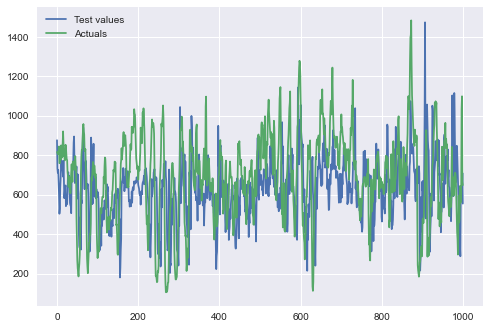

In [115]:
plt.plot(test_results6['Test Predictions 6 hour model'][:1000])
plt.plot(test_results6['Actuals'][:1000])
plt.legend(['Test values','Actuals'])